In [ ]:
import cv2
import numpy as np 

cap = cv2.VideoCapture(0) #Package CV2 will capture video by default webcam using "0"

while cap.isOpened(): #The code you have in the assignment did not work for me; the frames
    #kept saying "not responding" so looked for a working one for my computer online and
    #the one below works fine showing both color and gray framed images. "While"
    #creates a loop for the variable "cap" below.
    flags, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)#
    cv2.imshow('img', gray)#Shows the gray image and color image
    cv2.imshow('frame', frame)#Shows the frame and "frame" name
    key = cv2.waitKey(0) & 0xFF
    if key == ord("q"): #"q" breaks the loop and stops the image
        break
        
cap.release() #Releases the camera
cv2.destroyAllWindows() #Closes the images


In [ ]:
import keras
import tensorflow as tf 
new_model = tf.keras.models.load_model("C:\Users\rothg\Desktop\ANLY 535 Machine Learning II\Lab 3") 
 

In [ ]:
def get_img_contour_thresh(img):     
    x, y, w, h = 0, 0, 300, 300     
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)     
    blur = cv2.GaussianBlur(gray, (35, 35), 0)     
    ret, thresh1 = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV + 
cv2.THRESH_OTSU)     
    thresh1 = thresh1[y:y + h, x:x + w]     
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, 
cv2.CHAIN_APPROX_SIMPLE)[-2:]     
    return img, contours, thresh1 

In [ ]:
import keras
import tensorflow as tf 
new_model = tf.keras.models.load_model("C:\Users\rothg\Desktop\ANLY 535 Machine Learning II\Lab 3") 

import numpy as np
import cv2

cap = cv2.VideoCapture(0) 

while (cap.isOpened()):     
    ret, img = cap.read()     
    ret     
    img, contours, thresh = get_img_contour_thresh(img)     
    ans1 = ''     
    if len(contours) > 0:         
        contour = max(contours, key=cv2.contourArea)         
        if cv2.contourArea(contour) > 2500: 
            # print(predict(w_from_model,b_from_model,contour))             
            x, y, w, h = cv2.boundingRect(contour) 
            # newImage = thresh[y - 15:y + h + 15, x - 15:x + w +15]             
            newImage = thresh[y:y + h, x:x + w]             
            newImage = cv2.resize(newImage, (28, 28))             
            newImage = np.array(newImage)             
            newImage = newImage.flatten()             
            newImage = newImage.reshape(newImage.shape[0], 1)             
            newImage2 = newImage.flatten().reshape(1,28,28,1)             
            newImage2 = newImage2.astype('float32')             
            newImage2 /= 255             
            result = new_model.predict(newImage2)            
            ans1= np.argmax(result) 
            #ans1 = Digit_Recognizer_LR.predict(w_LR, b_LR, newImage)
            
    x, y, w, h = 0, 0, 300, 300     
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)     
    cv2.putText(img, "Prediction : " + str(ans1), (10, 320), cv2.FONT_HERSHEY_SIMPLEX, 0.7, 
(0, 0, 255), 2) 
 
    cv2.imshow("Frame", img)     
    cv2.imshow("Contours", thresh)     
    k = cv2.waitKey(10)     
    if k == 27:         
        break 
 
cap.release()
cv2.destroyAllWindows() 

In [ ]:
import cv2


face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

cap = cv2.VideoCapture(0)

while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex,ey,ew,eh) in eyes:
                cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    cv2.imshow('Lab 3 Face recognition',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break30

cap.release() 
cv2.destroyAllWindows()   

In [39]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
np.random.seed(7)

In [40]:
# Just load 5000 cases 

top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [41]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [42]:
import tensorflow
from tensorflow.keras.layers import Embedding

In [43]:
# design model #Word embedding is the collective name for a set of language modeling and feature learning techniques 
#in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
hist= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 307s 12ms/sample - loss: 0.5085 - accuracy: 0.7440 - val_loss: 0.3909 - val_accuracy: 0.8306
Epoch 2/3
25000/25000 [==============================] - 304s 12ms/sample - loss: 0.3364 - accuracy: 0.8600 - val_loss: 0.3552 - val_accuracy: 0.8485
Epoch 3/3
25000/25000 

In [45]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.04%


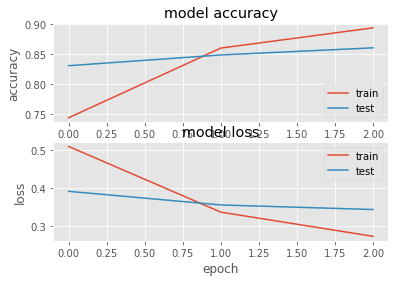

In [46]:
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='lower right') 
 
plt.subplot(2,1,2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
 
plt.show()

In [48]:
from tensorflow.keras.layers import Dense, Dropout, Flatten 
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.5)) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
hist= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 291s 12ms/sample - loss: 4.2158 - accuracy: 0.5622 - val_loss: 0.6101 - val_accuracy: 0.6455
Epoch 2/3
25000/25000 [=================

In [50]:
import numpy
from tensorflow.keras.layers import Conv1D, MaxPooling1D
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 102s 4ms/sample - loss: 0.40